In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Анализ данных

In [215]:
df = pd.read_csv('result.csv')

Обзор датасета первых 10 элементов

In [216]:
df.head(10)

,Unnamed: 0,course_id,course_name,subject,subject_type,course_type,course_start_date,student_id,student_last_name,city,is_active,course_created_at,full_months_access,completed_homeworks_count
0,0,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,10001,Markova,Самара,Да,2024-07-25 18:04:20,2.0,10
1,1,19,Годовой 2к25 стандарт,Русский,ЕГЭ,Годовой,2024-09-21,10001,Markova,Самара,Да,2024-07-25 18:04:20,2.0,9
2,2,24,В погоне за пятеркой 2К25 стандарт,Математика (база),ЕГЭ,Годовой,2024-09-17,10001,Markova,Самара,Да,2024-09-01 07:49:22,2.0,3
3,3,19,Годовой 2к25 стандарт,Русский,ЕГЭ,Годовой,2024-09-21,10002,Коваленко,Москва,Нет,2024-07-25 18:07:04,1.0,5
4,4,21,Годовой 2к25 стандарт,Химия,ЕГЭ,Годовой,2024-09-16,10005,Гусев,Белгород,Да,2024-07-26 05:38:40,1.0,1
5,5,25,Годовой 2к25 стандарт,Биология,ЕГЭ,Годовой,2024-09-17,10005,Гусев,Белгород,Да,2024-07-26 05:38:48,1.0,1
6,6,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,10006,Пушкина,Москва,Да,2024-07-25 18:48:31,2.0,17
7,7,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,10009,Чернобель,Минеральные Воды,Да,2024-07-26 06:05:09,2.0,16
8,8,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,10010,Мирзоян,Якутск,Да,2024-07-26 11:35:32,2.0,15
9,9,18,Годовой 2к25 стандарт,История,ЕГЭ,Годовой,2024-09-18,10010,Мирзоян,Якутск,Да,2024-07-26 11:35:32,2.0,15


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5385 entries, 0 to 5384
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 5385 non-null   int64  
 1   course_id                  5385 non-null   int64  
 2   course_name                5385 non-null   object 
 3   subject                    5385 non-null   object 
 4   subject_type               5385 non-null   object 
 5   course_type                5385 non-null   object 
 6   course_start_date          5385 non-null   object 
 7   student_id                 5385 non-null   int64  
 8   student_last_name          5385 non-null   object 
 9   city                       5385 non-null   object 
 10  is_active                  5385 non-null   object 
 11  course_created_at          5385 non-null   object 
 12  full_months_access         5370 non-null   float64
 13  completed_homeworks_count  5385 non-null   int64

Удаляем колонку 'Unnamed: 0', так как она не несет важную информацию

In [218]:

df=df.drop(columns='Unnamed: 0')

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5385 entries, 0 to 5384
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   course_id                  5385 non-null   int64  
 1   course_name                5385 non-null   object 
 2   subject                    5385 non-null   object 
 3   subject_type               5385 non-null   object 
 4   course_type                5385 non-null   object 
 5   course_start_date          5385 non-null   object 
 6   student_id                 5385 non-null   int64  
 7   student_last_name          5385 non-null   object 
 8   city                       5385 non-null   object 
 9   is_active                  5385 non-null   object 
 10  course_created_at          5385 non-null   object 
 11  full_months_access         5370 non-null   float64
 12  completed_homeworks_count  5385 non-null   int64  
dtypes: float64(1), int64(3), object(9)
memory usage:

In [220]:
df.duplicated(keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
5380    False
5381    False
5382    False
5383    False
5384    False
Length: 5385, dtype: bool

В датафрейме дубликатов не обнаружено

In [221]:
df.isnull().sum()

course_id                     0
course_name                   0
subject                       0
subject_type                  0
course_type                   0
course_start_date             0
student_id                    0
student_last_name             0
city                          0
is_active                     0
course_created_at             0
full_months_access           15
completed_homeworks_count     0
dtype: int64

Видно, что присутствуют большое количество NULL-значений в столбце full_months_access

In [222]:
df.dtypes

course_id                      int64
course_name                   object
subject                       object
subject_type                  object
course_type                   object
course_start_date             object
student_id                     int64
student_last_name             object
city                          object
is_active                     object
course_created_at             object
full_months_access           float64
completed_homeworks_count      int64
dtype: object

Числовые столбцы: course_id, student_id, full_months_access, completed_homeworks_count
Строковые значения: course_name, subject, subject_type, course_type, course_start_date, student_last_name, city, is_active


In [223]:
df['full_months_access'].unique()

array([ 2.,  1.,  0.,  3.,  9., 10.,  6., nan,  8.,  4.,  5.,  7.])

In [224]:
df = df.dropna(subset=['full_months_access'])

In [225]:
df.isnull().sum()

course_id                    0
course_name                  0
subject                      0
subject_type                 0
course_type                  0
course_start_date            0
student_id                   0
student_last_name            0
city                         0
is_active                    0
course_created_at            0
full_months_access           0
completed_homeworks_count    0
dtype: int64

In [226]:
df['full_months_access'] = df['full_months_access'].astype(int)

Удаляем Null-значения в столбце full_months_access, так как их незначительное количество, и переводим в integer

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5370 entries, 0 to 5384
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   course_id                  5370 non-null   int64 
 1   course_name                5370 non-null   object
 2   subject                    5370 non-null   object
 3   subject_type               5370 non-null   object
 4   course_type                5370 non-null   object
 5   course_start_date          5370 non-null   object
 6   student_id                 5370 non-null   int64 
 7   student_last_name          5370 non-null   object
 8   city                       5370 non-null   object
 9   is_active                  5370 non-null   object
 10  course_created_at          5370 non-null   object
 11  full_months_access         5370 non-null   int64 
 12  completed_homeworks_count  5370 non-null   int64 
dtypes: int64(4), object(9)
memory usage: 587.3+ KB


In [228]:
df.isnull().sum()

course_id                    0
course_name                  0
subject                      0
subject_type                 0
course_type                  0
course_start_date            0
student_id                   0
student_last_name            0
city                         0
is_active                    0
course_created_at            0
full_months_access           0
completed_homeworks_count    0
dtype: int64

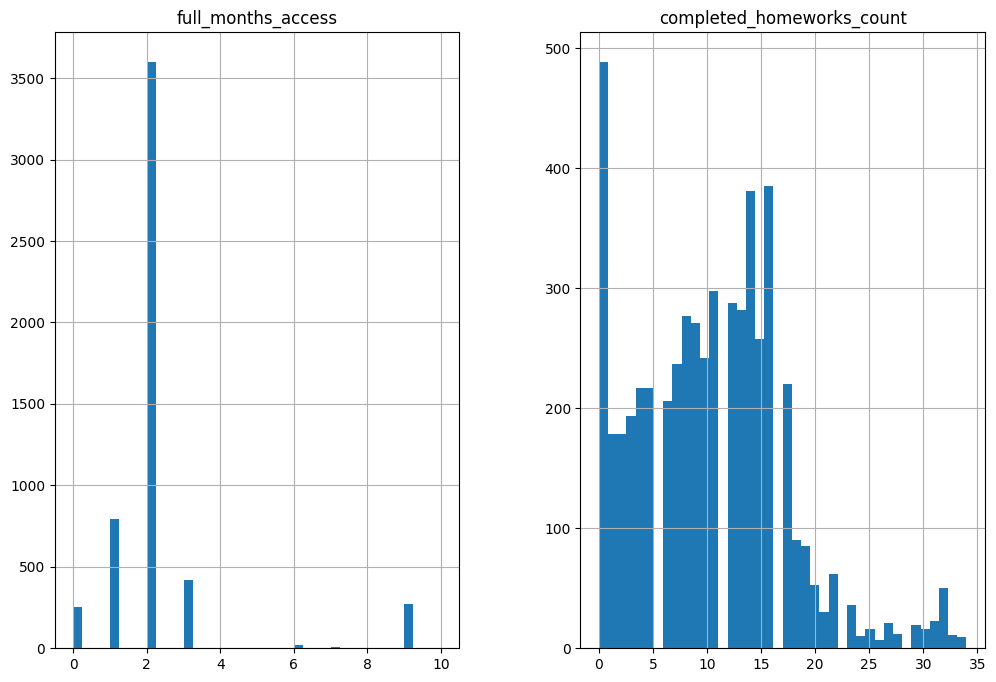

In [229]:
df[['full_months_access', 'completed_homeworks_count']].hist(bins=40, figsize=(12, 8))
plt.show()


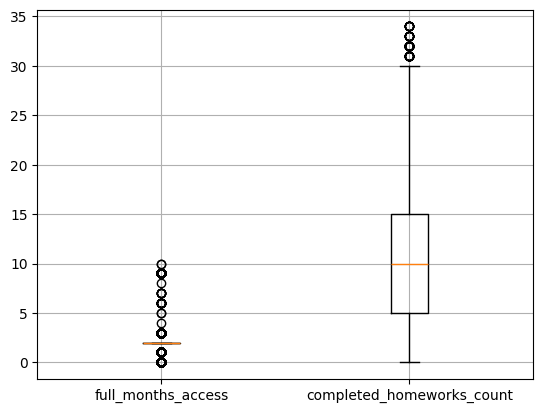

In [230]:
plt.boxplot(x = df[['full_months_access', 'completed_homeworks_count']], tick_labels = ['full_months_access', 'completed_homeworks_count'])
plt.grid(True)
plt.show()

In [231]:
print(df['full_months_access'].describe())
print(df[df['full_months_access'] > 9].value_counts().sort_index())

count    5370.000000
mean        2.216574
std         1.722136
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max        10.000000
Name: full_months_access, dtype: float64
course_id  course_name            subject  subject_type  course_type  course_start_date  student_id  student_last_name  city        is_active  course_created_at    full_months_access  completed_homeworks_count
19         Годовой 2к25 стандарт  Русский  ЕГЭ           Годовой      2024-09-21         10088       Ваулина            Шебекино    Да         2024-09-26 19:36:24  10                  14                           1
21         Годовой 2к25 стандарт  Химия    ЕГЭ           Годовой      2024-09-16         28027       Баландина          Красноярск  Да         2024-09-23 15:58:54  10                  9                            1
Name: count, dtype: int64


In [232]:
print(df['completed_homeworks_count'].describe())
print(df[df['completed_homeworks_count'] > 33].value_counts().sort_index())

count    5370.00000
mean       10.31676
std         6.92592
min         0.00000
25%         5.00000
50%        10.00000
75%        15.00000
max        34.00000
Name: completed_homeworks_count, dtype: float64
course_id  course_name            subject          subject_type  course_type  course_start_date  student_id  student_last_name  city             is_active  course_created_at    full_months_access  completed_homeworks_count
17         Годовой 2к25 стандарт  Английский язык  ЕГЭ           Годовой      2024-09-20         10191       Шарикова           Санкт-Петербург  Да         2024-08-12 17:54:44  2                   34                           1
                                                                                                 10505       Рифовна            Белорецк         Да         2024-08-31 19:06:59  3                   34                           1
                                                                                                 10906       Нико

Аномальные числовые значения не наблюдаются

In [233]:
df['course_name'].value_counts()

course_name
Годовой 2к25 стандарт                                              4184
Годовой курс 2к25                                                   487
Годовой 2К25 стандарт с Машей                                       380
В погоне за пятеркой 2К25 стандарт                                  167
Годовой 2К25 стандарт с Катей                                       108
Годовой 2к25 платинум                                                29
Годовой курс 2к25 комбо (русский + обществознание + математика)      11
Годовой 2к25 минимал                                                  4
Name: count, dtype: int64

Аномальных значений нет

In [234]:
df['subject'].value_counts()

subject
Обществознание        1668
Русский                865
Математика             488
Литература             427
Английский язык        397
История                356
Биология               271
Математика (база)      167
Обществознание ОГЭ     166
Математика ОГЭ         151
Русский ОГЭ            133
Химия                  129
Физика                 104
Биология ОГЭ            48
Name: count, dtype: int64

Странно что у некоторых предметов в название присутствуют ОГЭ, это информация о типе предмета должна храниться в столбце subject_type

In [235]:
df['subject_type'].value_counts()

subject_type
ЕГЭ    4872
ОГЭ     498
Name: count, dtype: int64

Аномальных значений нет

In [236]:
df['course_type'].value_counts()

course_type
Годовой    5370
Name: count, dtype: int64

Аномальных значений нет

In [237]:
df['student_last_name'].value_counts()

student_last_name
Максимова    25
Иванова      24
Петрова      24
Кузнецова    23
Смирнова     13
             ..
Воронова      1
Прокошева     1
Панфилова     1
Verner        1
Чурина        1
Name: count, Length: 2712, dtype: int64

In [238]:
print(df['student_last_name'].str.len().describe())

non_alpha_cities = df[df['student_last_name'].str.contains(r'[^а-яА-ЯёЁ\- ]', regex=True, na=False)]
print("\nФамилии с нестандартными символами:\n", non_alpha_cities['student_last_name'].unique())

abnormal_length = df[(df['student_last_name'].str.len() < 2) | (df['student_last_name'].str.len() > 19)]
print("\nФамилии с аномальной длиной:\n", abnormal_length['student_last_name'].unique())

numeric_cities = df[df['student_last_name'].str.match(r'^\d+$', na=False)]
print("\nЧисловые Фамилии:\n", numeric_cities['student_last_name'].unique())

count    5370.000000
mean        7.845996
std         1.951910
min         1.000000
25%         7.000000
50%         8.000000
75%         9.000000
max        20.000000
Name: student_last_name, dtype: float64

Фамилии с нестандартными символами:
 ['Markova' 'Kesian' 'Ki' 'Sheina' 'Abdulaeva' 'Gold' 'Fox' 'Voskanyan'
 'Ankha' 'Alexandrova' 'Semendyaeva' 'Andre' 'Nurmagomedova' 'Markaryan'
 'Loskutova' 'Perhova' 'Gabuev' 'Kiriianova' 'Hasbolatova' 'Anisimova'
 'Koo' 'Osaulenko' 'Nuta' 'Fakhretdinova' 'Abovyan' 'Vinas' 'Nastiaa'
 'Mysova' 'Saidismoilova' 'Saidibroimov' 'Getmanova' 'Tkacheva' 'Dragon'
 'Uiuuuu' 'Sab' 'Cheese' 'Yun' 'Safina' 'Or' 'Sokolov' 'Kien' 'Shevtsova'
 'Chakhmakhchyan' 'Wwnv' 'Fly' 'Vart' 'Arustamyan' 'Korchynskaya' 'Rakhm'
 'Shevchenko' 'Golikova' 'A' 'Karokurt' 'Zharova' 'Mironovskaya' 'Kazina'
 'Shilenko' 'Tatiana' 'VuyS' 'Kkkk' 'Guzik' 'Alone' 'Zinoveva'
 'Procopieva' 'V' 'Zainagabdinova' 'Petrosyan' 'Neyaskina' 'Busova'
 'Gavre' 'Vinnik' 'You' 'Fodeeva' 'Nam' 'Mi

In [239]:
df['city'].value_counts()

city
Москва             754
Санкт-Петербург    190
Казань             106
Краснодар          104
Новосибирск         87
                  ... 
Семикаракорск        1
Медногорск           1
Вязьма               1
Верхний Уфалей       1
Шумерля              1
Name: count, Length: 575, dtype: int64

In [240]:
print(df['city'].str.len().describe())

non_alpha_cities = df[df['city'].str.contains(r'[^а-яА-ЯёЁ\- ]', regex=True, na=False)]
print("\nГорода с нестандартными символами:\n", non_alpha_cities['city'].unique())

abnormal_length = df[(df['city'].str.len() < 3) | (df['city'].str.len() > 27)]
print("\nГорода с аномальной длиной:\n", abnormal_length['city'].unique())

numeric_cities = df[df['city'].str.match(r'^\d+$', na=False)]
print("\nЧисловые города:\n", numeric_cities['city'].unique())

count    5370.000000
mean        8.222346
std         3.124370
min         3.000000
25%         6.000000
50%         7.000000
75%        10.000000
max        28.000000
Name: city, dtype: float64

Города с нестандартными символами:
 ['Снежное\r' 'Макеевка\r' 'Донецк\r' 'Мариуполь\r' 'Ровеньки\r'
 'Бердянск\r' 'Краснодон\r']

Города с аномальной длиной:
 ['Республика Дагестанские Огни']

Числовые города:
 []


In [241]:
df['is_active'].value_counts() 

is_active
Да     5066
Нет     304
Name: count, dtype: int64

Аномальных значений нет

# 2. Деление на волны

In [242]:
df.head(10)

,course_id,course_name,subject,subject_type,course_type,course_start_date,student_id,student_last_name,city,is_active,course_created_at,full_months_access,completed_homeworks_count
0,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,10001,Markova,Самара,Да,2024-07-25 18:04:20,2,10
1,19,Годовой 2к25 стандарт,Русский,ЕГЭ,Годовой,2024-09-21,10001,Markova,Самара,Да,2024-07-25 18:04:20,2,9
2,24,В погоне за пятеркой 2К25 стандарт,Математика (база),ЕГЭ,Годовой,2024-09-17,10001,Markova,Самара,Да,2024-09-01 07:49:22,2,3
3,19,Годовой 2к25 стандарт,Русский,ЕГЭ,Годовой,2024-09-21,10002,Коваленко,Москва,Нет,2024-07-25 18:07:04,1,5
4,21,Годовой 2к25 стандарт,Химия,ЕГЭ,Годовой,2024-09-16,10005,Гусев,Белгород,Да,2024-07-26 05:38:40,1,1
5,25,Годовой 2к25 стандарт,Биология,ЕГЭ,Годовой,2024-09-17,10005,Гусев,Белгород,Да,2024-07-26 05:38:48,1,1
6,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,10006,Пушкина,Москва,Да,2024-07-25 18:48:31,2,17
7,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,10009,Чернобель,Минеральные Воды,Да,2024-07-26 06:05:09,2,16
8,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,10010,Мирзоян,Якутск,Да,2024-07-26 11:35:32,2,15
9,18,Годовой 2к25 стандарт,История,ЕГЭ,Годовой,2024-09-18,10010,Мирзоян,Якутск,Да,2024-07-26 11:35:32,2,15


Преобразуем тип данных времени

In [243]:
df['course_created_at'] = pd.to_datetime(df['course_created_at'])

In [244]:
df['course_start_date'] = pd.to_datetime(df['course_start_date'])

In [245]:
df.head(5)

,course_id,course_name,subject,subject_type,course_type,course_start_date,student_id,student_last_name,city,is_active,course_created_at,full_months_access,completed_homeworks_count
0,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,10001,Markova,Самара,Да,2024-07-25 18:04:20,2,10
1,19,Годовой 2к25 стандарт,Русский,ЕГЭ,Годовой,2024-09-21,10001,Markova,Самара,Да,2024-07-25 18:04:20,2,9
2,24,В погоне за пятеркой 2К25 стандарт,Математика (база),ЕГЭ,Годовой,2024-09-17,10001,Markova,Самара,Да,2024-09-01 07:49:22,2,3
3,19,Годовой 2к25 стандарт,Русский,ЕГЭ,Годовой,2024-09-21,10002,Коваленко,Москва,Нет,2024-07-25 18:07:04,1,5
4,21,Годовой 2к25 стандарт,Химия,ЕГЭ,Годовой,2024-09-16,10005,Гусев,Белгород,Да,2024-07-26 05:38:40,1,1


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5370 entries, 0 to 5384
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   course_id                  5370 non-null   int64         
 1   course_name                5370 non-null   object        
 2   subject                    5370 non-null   object        
 3   subject_type               5370 non-null   object        
 4   course_type                5370 non-null   object        
 5   course_start_date          5370 non-null   datetime64[ns]
 6   student_id                 5370 non-null   int64         
 7   student_last_name          5370 non-null   object        
 8   city                       5370 non-null   object        
 9   is_active                  5370 non-null   object        
 10  course_created_at          5370 non-null   datetime64[ns]
 11  full_months_access         5370 non-null   int64         
 12  completed_h

Функция для определения волны

In [247]:
def assign_wave(days_diff):
    if days_diff <= 0:
        return "0 волна"
    elif 0 < days_diff <= 7:
        return "1 волна"
    elif 7 < days_diff <= 14:
        return "2 волна"
    elif 14 < days_diff <= 21:
        return "3 волна"
    elif 21 < days_diff <= 28:
        return "4 волна"
    else:
        return "5 волна"

In [248]:
df['wave'] = (df['course_created_at'] - df['course_start_date']).dt.days.apply(assign_wave)

In [249]:
df.head(10)

,course_id,course_name,subject,subject_type,course_type,course_start_date,student_id,student_last_name,city,is_active,course_created_at,full_months_access,completed_homeworks_count,wave
0,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,10001,Markova,Самара,Да,2024-07-25 18:04:20,2,10,0 волна
1,19,Годовой 2к25 стандарт,Русский,ЕГЭ,Годовой,2024-09-21,10001,Markova,Самара,Да,2024-07-25 18:04:20,2,9,0 волна
2,24,В погоне за пятеркой 2К25 стандарт,Математика (база),ЕГЭ,Годовой,2024-09-17,10001,Markova,Самара,Да,2024-09-01 07:49:22,2,3,0 волна
3,19,Годовой 2к25 стандарт,Русский,ЕГЭ,Годовой,2024-09-21,10002,Коваленко,Москва,Нет,2024-07-25 18:07:04,1,5,0 волна
4,21,Годовой 2к25 стандарт,Химия,ЕГЭ,Годовой,2024-09-16,10005,Гусев,Белгород,Да,2024-07-26 05:38:40,1,1,0 волна
5,25,Годовой 2к25 стандарт,Биология,ЕГЭ,Годовой,2024-09-17,10005,Гусев,Белгород,Да,2024-07-26 05:38:48,1,1,0 волна
6,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,10006,Пушкина,Москва,Да,2024-07-25 18:48:31,2,17,0 волна
7,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,10009,Чернобель,Минеральные Воды,Да,2024-07-26 06:05:09,2,16,0 волна
8,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,10010,Мирзоян,Якутск,Да,2024-07-26 11:35:32,2,15,0 волна
9,18,Годовой 2к25 стандарт,История,ЕГЭ,Годовой,2024-09-18,10010,Мирзоян,Якутск,Да,2024-07-26 11:35:32,2,15,0 волна


In [250]:
df.to_csv('final.csv')

In [251]:
df[(df['course_name'] == 'Летняя школа 2к24') & (df['subject'] == 'Русский')]

,course_id,course_name,subject,subject_type,course_type,course_start_date,student_id,student_last_name,city,is_active,course_created_at,full_months_access,completed_homeworks_count,wave
